In [1]:
# Important necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from matplotlib.lines import Line2D
from tqdm import *
%matplotlib inline  

# Reading the Data

In [2]:
def readfile(name, folder='../analysis/ntuples_2_6/', lumi=37*1000):
    """ Read .evt and .meta files as output by monojet.C and 
        properly weigh events
    """
    data = pd.read_csv(folder+name+'.evt', header=0, delimiter=',', skipinitialspace=True)
    data.meta = pd.read_csv(folder+name+'.meta', header=0, delimiter=',', skipinitialspace=True)
    if 'weight' in data.columns:
        data['weight'] *= (data.meta['cxn']*lumi/data.meta['sum_weight'])[0]
    else:
        data['weight'] = (data.meta['cxn']*lumi / data.meta['nevt'])[0]  
    return data

In [3]:
# Read background distributions
bkg = ['bkg_ttbar_semilep', 'bkg_ttbar_dilep', 'bkg_Wj', 'bkg_Zj']
bkg = [ readfile(f) for f in bkg ]

In [4]:
def to_str(num):
    if num <= .9:
        return '{:.1g}'.format(num)
    elif num!= 1:
        return '{:.2g}'.format(num)
    else:
        return '1.0'

# Array of rinv values run over
# rinv = [.01, .1, .2, .3, .4, .5, .6, .7, .8, .9, .99, 1.0 ]
rinv = [.01, .3, .6, 1.0 ]


rinv_str_base = [  to_str(r)  for r in rinv ]

# Read signal distributions for various DM masses

rinv_str = [ 'tchannel_total_M500_rinv' + st for st in rinv_str_base ]
# sig10 = [ readfile(f, '../gen/tChannelDirect//') for f in rinv_str ]
sig10 = [ readfile(f, '../gen/tChannelTotalFinal//') for f in rinv_str ]


# rinv_str = [ 'Zprime_MZ_4000_gX_1_gq_0p1_rinv_' + st for st in rinv_str_base ]
# sig10 = [ readfile(f, '../gen/ZprimeEventsFixed/') for f in rinv_str ]

# Plot distributions

In [27]:
# make histograms
def newfig(name):
    fig=plt.figure(name,figsize=(9,7))
    plt.subplots_adjust(left=0.2, right=0.90, top=0.9, bottom=0.2)

    
def plot_met_cell(cell, l,sig, lw=3, ls='solid', label="temp"):
    newfig("met")
    coli=0
    for i,fb in enumerate(sig):
        if rinv[i] in l:
            f=fb.query('pt1 > 0 & MEt > 0')
            mylabel=("$r_{\\rm inv}=%0.1g$" % rinv[i])
            if rinv[i] > 0.9:
                mylabel="$r_{\\rm inv}=%0.2g$" % rinv[i]

            cell.hist(f['MEt'], weights=f['weight'], 
                     bins=np.linspace(100,2500,20 + 1),
                     histtype='step', color=plot_color[coli], alpha=.5, lw=1.6, linestyle=ls,
                     label=label)
            coli+=1
            cell.set_xlim([0,2500])
            cell.set_yscale('log', nonposy='clip')

def plot_dphi_cell(cell, l, sig, lw=3, ls='solid'):
    newfig("dphi")
    coli=0
    for i,fb in enumerate(sig):
        
        if rinv[i] in l:
            
            f=fb.query('pt1 > 250 & MEt > 100')
            mylabel=("$r_{\\rm inv}=%0.1g$" % rinv[i])
            if rinv[i] > 0.9:
                mylabel="$r_{\\rm inv}=%0.2g$" % rinv[i]

            cell.hist(f['dphi'], weights=f['weight'], 
                     bins=np.linspace(0,np.pi,20 + 1),
                     histtype='step', color=plot_color[coli], alpha=.5, lw=1.6, linestyle=ls,
                     label=mylabel)
            coli+=1
            cell.set_xlim([0,np.pi])
            cell.set_yscale('log', nonposy='clip')

def plot_pt_cell(cell, l, sig, lw=3, ls='solid'):
    newfig("dphi")
    coli=0
    for i,fb in enumerate(sig):
        
        if rinv[i] in l:
            
            f=fb.query('pt1 > 250 & MEt > 100')
            mylabel=("$r_{\\rm inv}=%0.1g$" % rinv[i])
            if rinv[i] > 0.9:
                mylabel="$r_{\\rm inv}=%0.2g$" % rinv[i]
            cell.hist(f['pt1'].values, weights=f['weight'], 
                     bins=np.linspace(100,2500,20 + 1),
                     histtype='step', color=plot_color[coli], alpha=.5, lw=1.6, linestyle=ls,
                     label=mylabel)
            cell.hist(f['pt2'].values, weights=f['weight'], 
                     bins=np.linspace(100,2500,20 + 1),
                     histtype='step', color=plot_color[coli], alpha=.5, lw=1.6, linestyle='--')
            cell.hist(f['pt3'].values, weights=f['weight'], 
                     bins=np.linspace(100,2500,20 + 1),
                     histtype='step', color=plot_color[coli], alpha=.5, lw=1.6, linestyle='-.')



            coli+=1
            cell.set_xlim([100,2500])
            cell.set_yscale('log', nonposy='clip')

plot_color=['forestgreen','cornflowerblue', 'maroon','goldenrod','violet','maroon','darkgrey','lightpink','black','forestgreen','cornflowerblue', 'salmon','violet','goldenrod','maroon','darkgrey','lightpink']
plot_ls=['solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid']



In [18]:
masses = [500,1000,2000,3000,4000,5000,7000,10000,50000,100000]


5it [00:02,  1.84it/s]


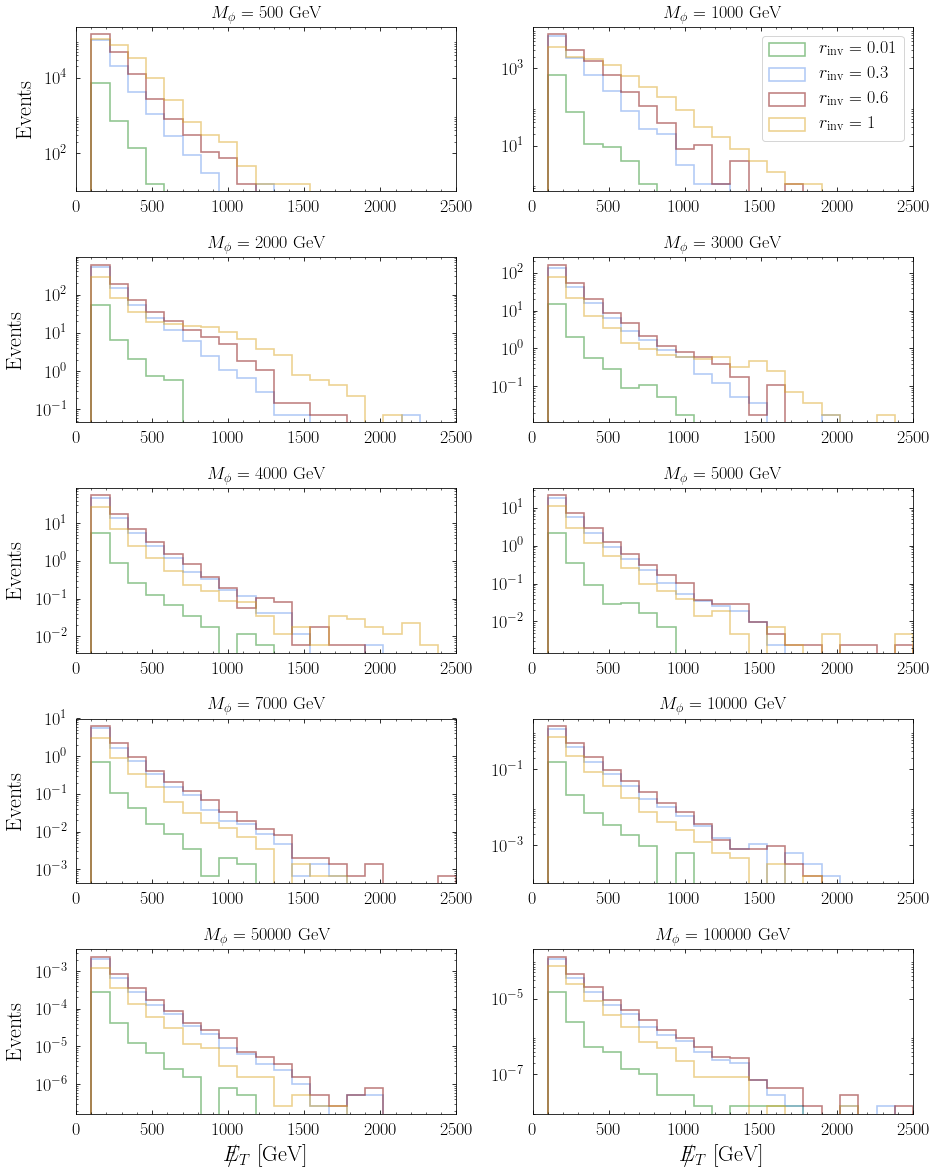

In [19]:
fig, axes2d = plt.subplots(nrows=5, ncols=2,
                           figsize=(15,20))


for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        M = masses[i*2 + j]
        
        rinv_str = [ 'tchannel_total_M'+str(M)+'_rinv' + st for st in rinv_str_base ]
        sig10 = [ readfile(f, '../gen/tChannelTotalFinal///') for f in rinv_str ]

        
        plot_met_cell(cell, l=[.01, .3, .6, 1.], sig=sig10, lw=2, ls = 'solid')
        if i*2 + j in range(8,10):
            cell.set_xlabel(r'$\slash \!\!\!\! E_{T}$ [GeV]',fontsize=22)
        if (i*2 + j) % 2 == 0:
            cell.set_ylabel(r'${\rm Events}$',fontsize=22)

        if (i*2 + j) == 1:
            cell.legend()
        cell.set_title("$M_\phi = $ "+str(M)+" GeV")

fig.subplots_adjust(wspace=.2, hspace=.4)
# plt.tight_layout()
fig.savefig("tChMETTotal.pdf")



4it [00:02,  1.87it/s]


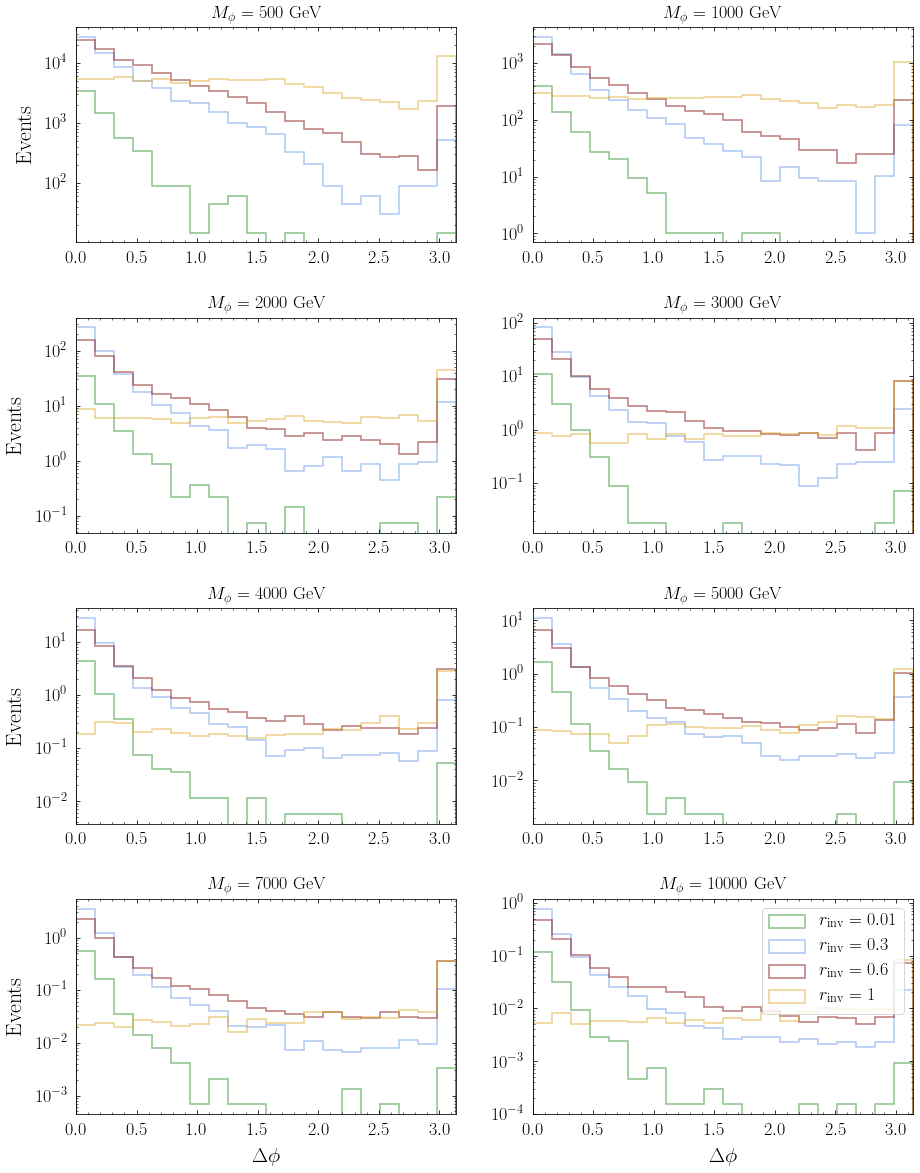

In [20]:
fig, axes2d = plt.subplots(nrows=4, ncols=2,
                           figsize=(15,20))


for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        M = masses[i*2 + j]
        
        rinv_str = [ 'tchannel_total_M'+str(M)+'_rinv' + st for st in rinv_str_base ]
        sig10 = [ readfile(f, '../gen/tChannelTotalFinal///') for f in rinv_str ]

        
        plot_dphi_cell(cell, l=[.01, .3, .6,1.0], sig=sig10, lw=2, ls = 'solid')
        if i*2 + j in range(6,8):
            cell.set_xlabel(r'$\Delta \phi$',fontsize=21)
        if (i*2 + j) % 2 == 0:
            cell.set_ylabel(r'${\rm Events}$',fontsize=22)

        if (i*2 + j) == 7:
            cell.legend()
        cell.set_title("$M_\phi = $ "+str(M)+" GeV")

fig.subplots_adjust(wspace=.2, hspace=.35)
# plt.tight_layout()
fig.savefig("tChDphiTotal.pdf")



In [9]:
# fig, axes2d = plt.subplots(nrows=4, ncols=2,
#                            figsize=(15,15))


# for i, row in tqdm(enumerate(axes2d)):
#     for j, cell in enumerate(row):
#         M = masses[i*2 + j]
        
#         rinv_str = [ 'tchannel_M'+str(M)+'_rinv' + st for st in rinv_str_base ]
#         sig10 = [ readfile(f, '../gen/tChannelTotal//') for f in rinv_str ]

        
#         plot_pt_cell(cell, l=[.01, .3, .6,1.0], sig=sig10, lw=2, ls = 'solid')
#         if i*2 + j in range(6,8):
#             cell.set_xlabel(r'$p_T^{1,2}$ [GeV]',fontsize=22)
#         if (i*2 + j) % 2 == 0:
#             cell.set_ylabel(r'${\rm Events}$',fontsize=22)

#         if (i*2 + j) == 0:
#             cell.legend()
#         cell.set_title("$M_\phi = $ "+str(M)+" GeV")

# fig.subplots_adjust(wspace=.2, hspace=.35)
# # plt.tight_layout()
# # fig.savefig("tChPT.pdf")




In [10]:
masses = [500,1000,2000,3000,4000,5000,10000,100000]

4it [00:00,  5.06it/s]


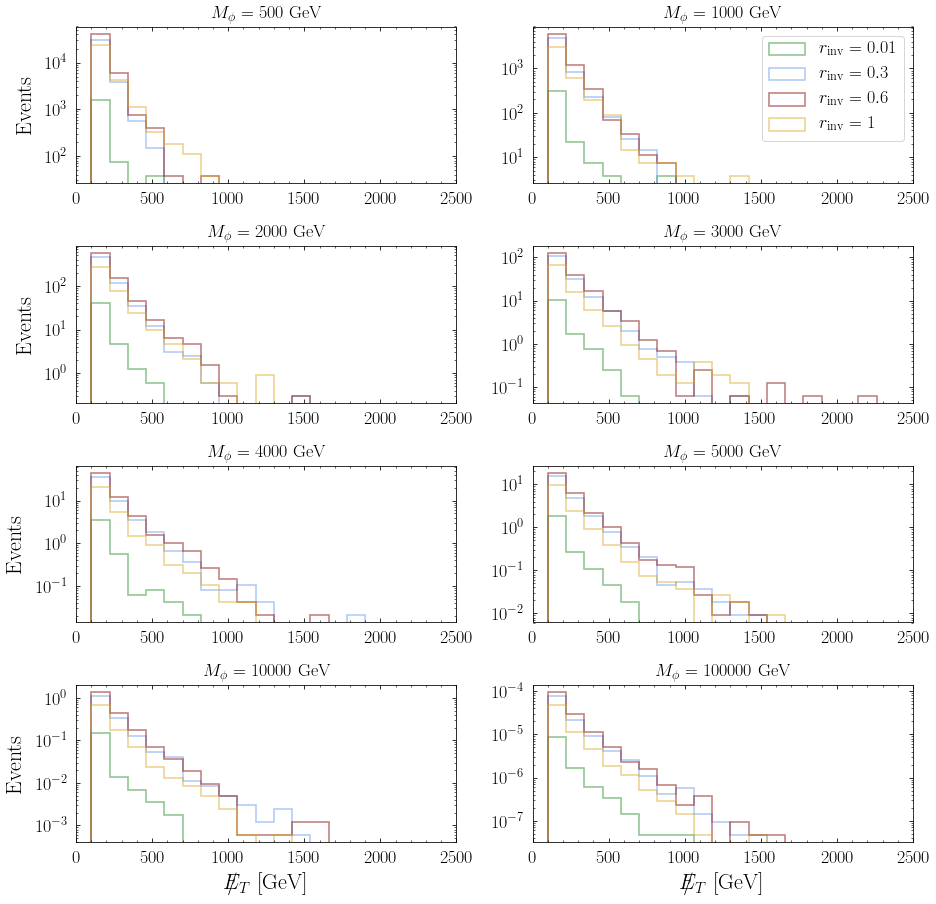

In [16]:
fig, axes2d = plt.subplots(nrows=4, ncols=2,
                           figsize=(15,15))


for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        M = masses[i*2 + j]
        
        rinv_str = [ 'tchannel_direct_M'+str(M)+'_rinv' + st for st in rinv_str_base ]
        sig10 = [ readfile(f, '../gen/tChannelDirectFinal///') for f in rinv_str ]

        
        plot_met_cell(cell, l=[.01, .3, .6, 1.], sig=sig10, lw=2, ls = 'solid')
        if i*2 + j in range(6,8):
            cell.set_xlabel(r'$\slash \!\!\!\! E_{T}$ [GeV]',fontsize=22)
        if (i*2 + j) % 2 == 0:
            cell.set_ylabel(r'${\rm Events}$',fontsize=22)

        if (i*2 + j) == 1:
            cell.legend()
        cell.set_title("$M_\phi = $ "+str(M)+" GeV")

fig.subplots_adjust(wspace=.2, hspace=.4)
# plt.tight_layout()
fig.savefig("tChMETDirect.pdf")




4it [00:00,  5.28it/s]


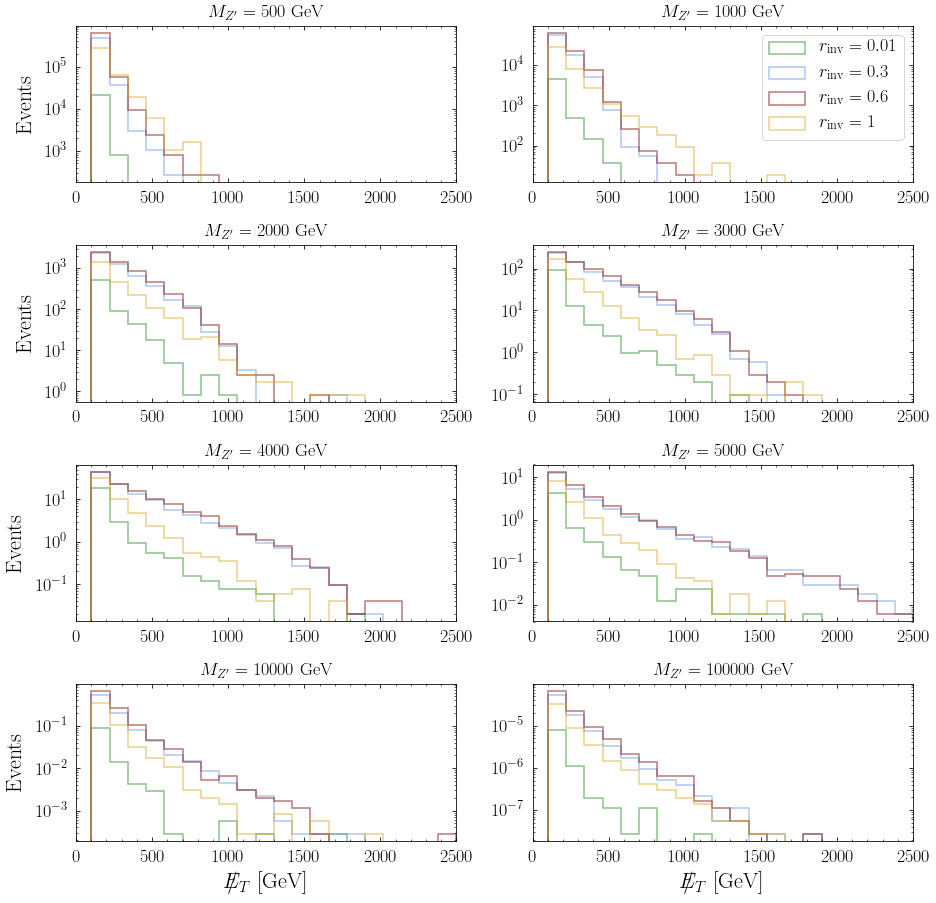

In [15]:
fig, axes2d = plt.subplots(nrows=4, ncols=2,
                           figsize=(15,15))


for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        M = masses[i*2 + j]
        
        rinv_str = [ 'zprime_direct_M'+str(M)+'_rinv' + st for st in rinv_str_base ]
        sig10 = [ readfile(f, '../gen/ZprimeDirectFinal/') for f in rinv_str ]

        
        plot_met_cell(cell, l=[.01, .3, .6, 1.], sig=sig10, lw=2, ls = 'solid')
        if i*2 + j in range(6,8):
            cell.set_xlabel(r'$\slash \!\!\!\! E_{T}$ [GeV]',fontsize=22)
        if (i*2 + j) % 2 == 0:
            cell.set_ylabel(r'${\rm Events}$',fontsize=22)

        if (i*2 + j) == 1:
            cell.legend()
        cell.set_title("$M_{Z^\prime} = $ "+str(M)+" GeV")

fig.subplots_adjust(wspace=.2, hspace=.4)
# plt.tight_layout()
fig.savefig("ZprMETDirect.pdf")





4it [00:01,  3.24it/s]


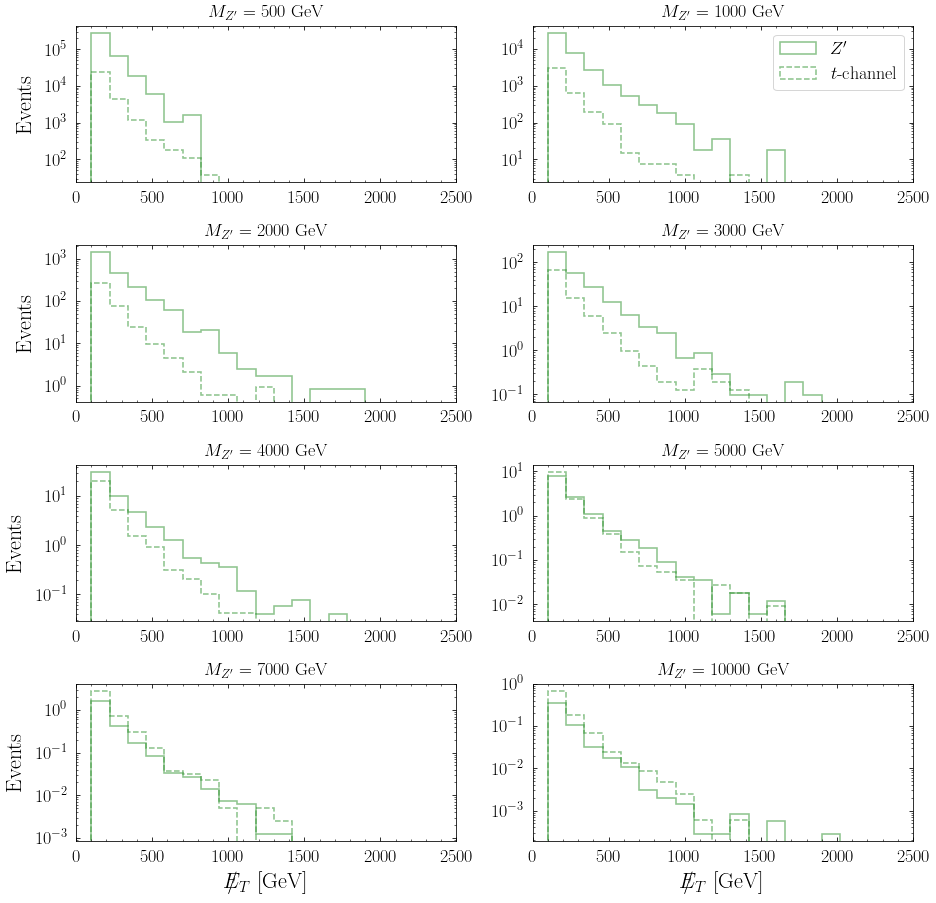

In [30]:
fig, axes2d = plt.subplots(nrows=4, ncols=2,
                           figsize=(15,15))


for i, row in tqdm(enumerate(axes2d)):
    for j, cell in enumerate(row):
        M = masses[i*2 + j]
        
        rinv_str = [ 'zprime_direct_M'+str(M)+'_rinv' + st for st in rinv_str_base ]
        sig10 = [ readfile(f, '../gen/ZprimeDirectFinal/') for f in rinv_str ]
        rinv_str = [ 'tchannel_direct_M'+str(M)+'_rinv' + st for st in rinv_str_base ]
        plot_met_cell(cell, l=[1.], sig=sig10, lw=2, ls = 'solid',label="$Z'$")
        sig10 = [ readfile(f, '../gen/tChannelDirectFinal/') for f in rinv_str ]
        plot_met_cell(cell, l=[1.], sig=sig10, lw=2, ls = '--',label="$t$-channel")


        if i*2 + j in range(6,8):
            cell.set_xlabel(r'$\slash \!\!\!\! E_{T}$ [GeV]',fontsize=22)
        if (i*2 + j) % 2 == 0:
            cell.set_ylabel(r'${\rm Events}$',fontsize=22)

        if (i*2 + j) == 1:
            cell.legend()
        cell.set_title("$M_{Z^\prime} = $ "+str(M)+" GeV")

fig.subplots_adjust(wspace=.2, hspace=.4)
# plt.tight_layout()
fig.savefig("ContactRinv1.pdf")




